In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from datetime import datetime as dt
import requests
from bs4 import BeautifulSoup
import re

In [4]:
data = pd.read_json('data/data.json')

def drop_columns(df1, list_o_columns=['approx_payout_date',
 'sale_duration2',
 'gts',
 'num_payouts',
 'num_order',
 'sequence_number']):
    '''
    drops from df1 all columns not existing in df2
    '''
    for col in list_o_columns:
        if col in df1.columns:
            df1.drop(col, axis=1, inplace = True)
    return df1

data = drop_columns(data)

/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


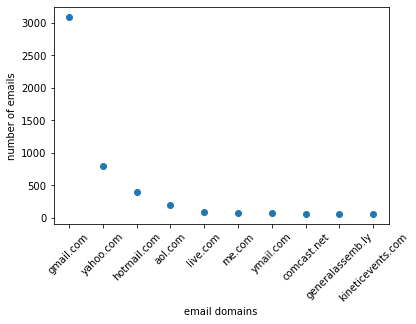

In [19]:
email = data['email_domain'].value_counts()[:10]
fig, ax = plt.subplots()
ax.scatter(email.index, email)
ax.set_xlabel('email domains')
ax.set_ylabel('number of emails')
ax.set_xticklabels(labels = email.index, rotation = 45);

In [5]:
data['currency'].value_counts()
### one hot encode venue_state, venue_country, country, currency ###
### explore description and ticket_types ###
### name, org description, org_name, payee_name, previous payouts, payout type, ticket types,  needs to be explored 

###

USD    9696
GBP    2222
CAD    1322
AUD     779
EUR     262
NZD      55
MXN       1
Name: currency, dtype: int64

In [5]:
def df_apply(df1):
    df = df1.copy()
    df['acct_type'] = df['acct_type'].apply(lambda x: 0 if x=='premium' else 1) # split fraud and not fraud
    df['venue_address'] = df['venue_address'].apply(lambda x: 0 if x=='' else 1) # helped classify missing addresses
    df['email_domain'] = df['email_domain'].apply(lambda x: 1 if x in ['gmail.com','yahoo.com','hotmail.com','aol.com','live.com'] else 0) # encode top 5 emails as 1 else 0
    df['user_created'] = df['user_created'].apply(dt.utcfromtimestamp) 
    df['event_created'] = df['event_created'].apply(dt.utcfromtimestamp)
    df['event_end'] = df['event_end'].apply(dt.utcfromtimestamp)
    df['event_published'] = df['event_published'].apply(lambda x: dt.utcfromtimestamp(x) if ~np.isnan(x) else x)
    df['event_start'] = df['event_start'].apply(lambda x: dt.utcfromtimestamp(x) if ~np.isnan(x) else x)
    
    
#     df['description'] = df['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
#     df['description'] = df['description'].apply(lambda x: x.replace('\n','').replace('\r','').replace('\xa0',''))
#     df['org_desc'] = df['org_desc'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
#     df['org_desc'] = df['org_desc'].apply(lambda x: x.replace('\n','').replace('\r','').replace('\xa0',''))    
    return df

data = df_apply(data)

In [6]:
def get_ticket_info(lst):
    if len(lst) > 0:
        costs = []
        count = []
        for dic in lst:
            costs.append(dic['cost'])
            count.append(dic['quantity_total'])
        return pd.Series([max(costs), min(costs), max(count), min(count)])
    else:
        return pd.Series([0, 0, 0, 0])
    
# data[['max_cost', 'min_cost', 'max_tickets', 'min_tickets']]= data['ticket_types'].apply(lambda x: get_ticket_info(x))  

In [7]:
df['same_loc'] = df['country'] == df['venue_country']
df['same_loc'] = df['same_loc'] * 1
df.fillna({'venue_state': 'none', 'venue_country': 'none', 'country': 'none'}, inplace=True)
def country_encode(x, prefix):
    if x == 'US':
        return prefix + 'US'
    elif x == 'GB':
        return prefix + 'GB'
    elif x == 'CA':
        return prefix + 'CA'
    elif x == 'none':
        return prefix + 'none'
    elif x == '':
        return prefix + ''
    else:
        return prefix + 'other'
df['venue_country'] = df['venue_country'].apply(lambda x: country_encode(x, 'venue'))
df['country'] = df['country'].apply(lambda x: country_encode(x, 'country'))
df['listed'] = df['listed'].map({'y':1, 'n':0})
df['delivery_method'].fillna(-1, inplace=True)
df['has_header'].fillna(-1, inplace=True)
df['org_facebook'].fillna(-1, inplace=True)
df['sale_duration'].fillna(0, inplace=True)
df['venue_latitude'].fillna(df['venue_latitude'].mean(), inplace=True)
df['venue_longitude'].fillna(df['venue_longitude'].mean(), inplace=True)
def get_ticket_info(lst):
    if len(lst) > 0:
        costs = []
        count = []
        for dic in lst:
            costs.append(dic['cost'])
            count.append(dic['quantity_total'])
        return pd.Series([max(costs), min(costs), max(count), min(count)])
    else:
        return pd.Series([0, 0, 0, 0])
df[['max_cost', 'min_cost', 'max_tickets', 'min_tickets']]= df['ticket_types'].apply(lambda x: get_ticket_info(x))
with open(encoder_filepath, 'rb') as f:
    fit_cat_encoder = pickle.loads(f)
cat_features = fit_cat_encoder.transform(df[['venue_country', 'country', 'currency', 'payout_type']])
array_cat_features = cat_features.toarray()
feature_labels = fit_cat_encoder.categories_
feature_labels = np.concatenate(feature_labels, axis=0)
for i, label in enumerate(feature_labels):
    df[label] = array_cat_features[:, i]

In [8]:
def drops(df, drop_columns = ['venue_latitude', 'venue_longitude', 'venue_name', 'description','event_created','event_end', 
                'event_published','event_start','name','object_id','org_desc','payee_name','org_name',
                'ticket_types','currency', 'venue_state','venue_country', 'venue_address', 'user_created',
               'payout_type', 'previous_payouts']):
    data = df.drop(drop_columns, axis = 1).copy()
    return data
    
data = drops(data)
data.columns

Index(['acct_type', 'body_length', 'channels', 'country', 'delivery_method',
       'email_domain', 'fb_published', 'has_analytics', 'has_header',
       'has_logo', 'listed', 'name_length', 'org_facebook', 'org_twitter',
       'sale_duration', 'show_map', 'user_age', 'user_type', 'same_loc',
       'max_cost', 'min_cost', 'max_tickets', 'min_tickets', 'venue',
       'venueCA', 'venueGB', 'venueUS', 'venuenone', 'venueother', 'countryCA',
       'countryGB', 'countryUS', 'countrynone', 'countryother', 'AUD', 'CAD',
       'EUR', 'GBP', 'MXN', 'NZD', 'USD', '', 'ACH', 'CHECK'],
      dtype='object')

In [9]:
data.dtypes


acct_type            int64
body_length          int64
channels             int64
country            float64
delivery_method    float64
email_domain         int64
fb_published         int64
has_analytics        int64
has_header         float64
has_logo             int64
listed               int64
name_length          int64
org_facebook       float64
org_twitter        float64
sale_duration      float64
show_map             int64
user_age             int64
user_type            int64
same_loc             int64
max_cost           float64
min_cost           float64
max_tickets        float64
min_tickets        float64
venue              float64
venueCA            float64
venueGB            float64
venueUS            float64
venuenone          float64
venueother         float64
countryCA          float64
countryGB          float64
countryUS          float64
countrynone        float64
countryother       float64
AUD                float64
CAD                float64
EUR                float64
G

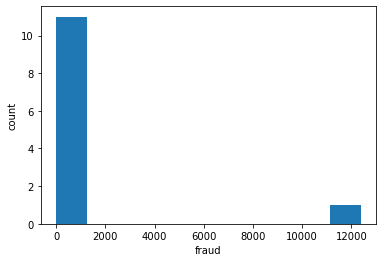

In [74]:
data[data['acct_type'] == 1]['org_desc'].value_counts()
fraud = data.acct_type.value_counts()

fig, ax = plt.subplots()
ax.hist(fraud)
ax.set_xlabel('fraud')
ax.set_ylabel('count');

In [85]:
y = data[data['acct_type'] == 1]['org_desc'].value_counts()
# BeautifulSoup(y[1], 'html.parser').get_text()
y

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       1115
Gametight Entertainment NewYork Club Promotion & Marketing Group brings you TOP NOTCH PARTIES ALL AROUND! Gametight brings you the hottest and most exclusive trend setting parties that the night life has to offer. From the elegance and ambiance of our venues to our a-list celebrity D

In [49]:
def master_apply(df):
    data = drop_columns(df.copy())
    data = df_apply(data)
    
    return data

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_data = data[['description','acct_type','org_desc']]
y = tfidf_data.pop('acct_type')
X = tfidf_data

X_train, X_test, y_train, y_test = train_test_split(X.description,y, stratify=y)

In [105]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tf_X = tfidf.fit_transform(X_train)


rf = RandomForestClassifier()
rf.fit(tf_X, y_train)
pred = rf.predict(tf_X)
rf.score(tf_X, y_train)

0.9701450892857143

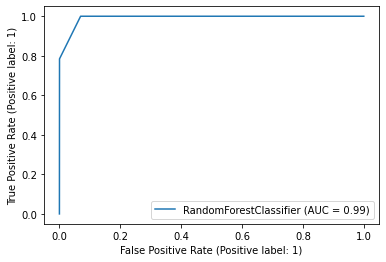

In [108]:
from sklearn.metrics import roc_curve, plot_roc_curve, confusion_matrix
plot_roc_curve(rf, tf_X, y_train);

In [111]:
tf_test = tfidf.transform(X_test)
pred_test = rf.predict(tf_test)
rf.score(tf_test, y_test)

0.8822873082287308

In [114]:
confusion_matrix(y_test, pred_test)

array([[3087,    7],
       [ 415,   76]])

In [ ]:
plot_roc_curve(rf, tf_X, y_train);